Warning message in matrix(rnorm(ngenes * ncells), nrow = ngenes, ncol = 2):
“data length differs from size of matrix: [100000 != 100 x 2]”


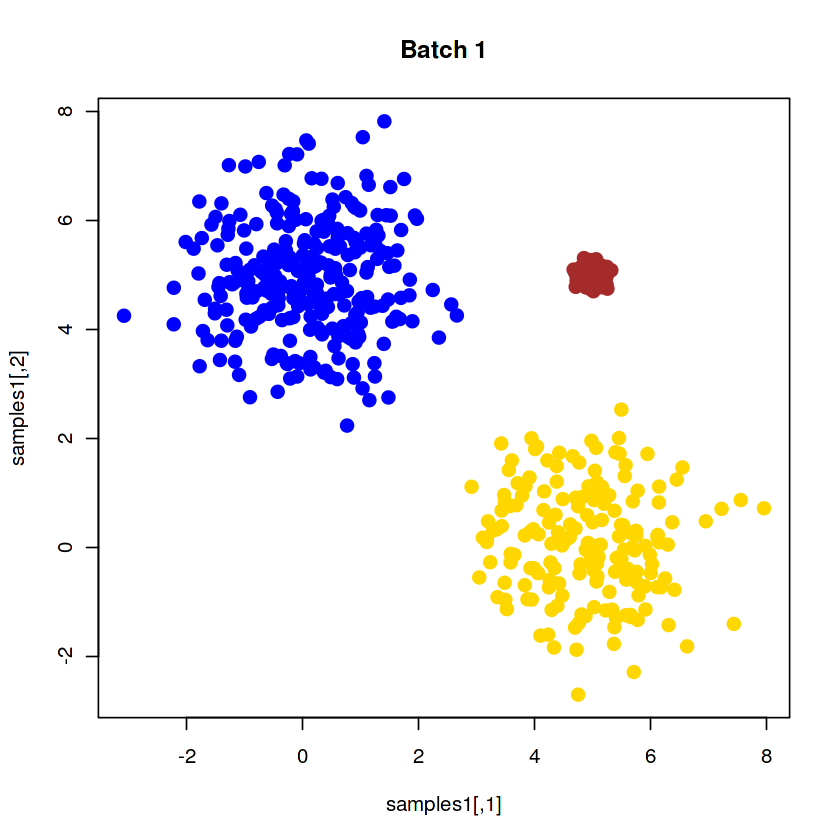

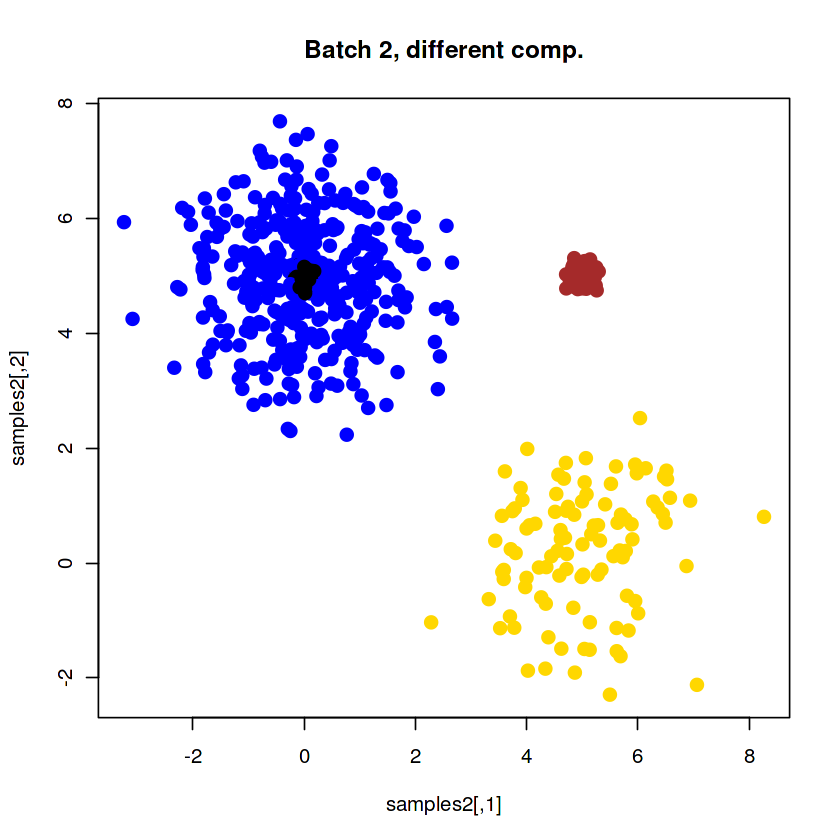

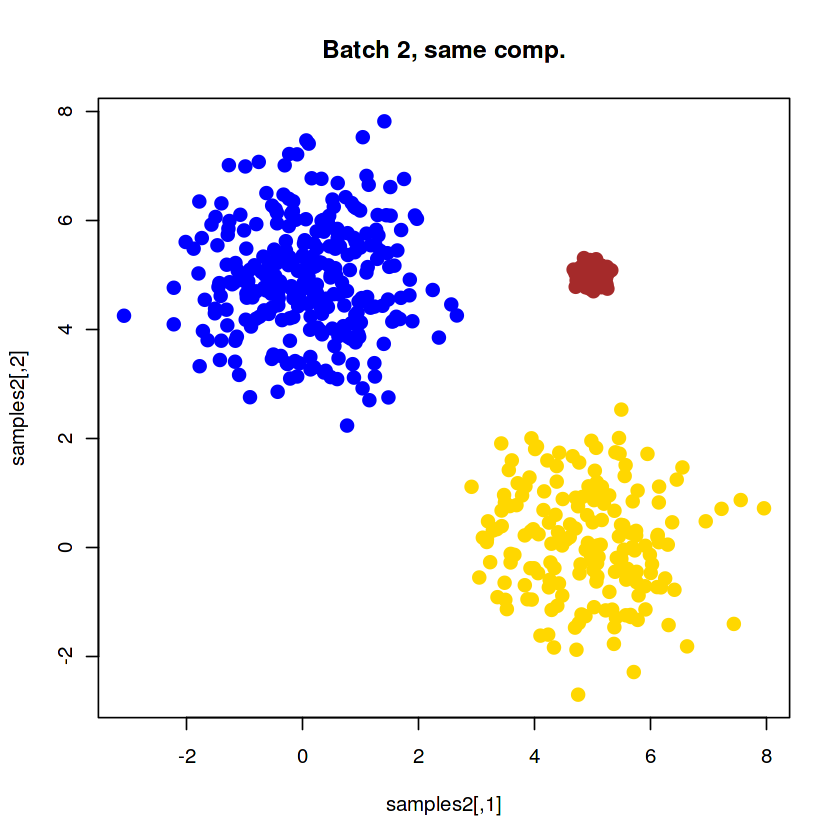

In [44]:
# This script generates some (highly synthetic!) expression data with a batch effect 
# and uneven population composition between batches.
this.dir <- '.'
setwd(this.dir)

ncells <- 1000  # Number of cells

# Our simulation involves three cell types/components.
# Cells are distributed according to a bivariate normal in a 2-D biological subspace. 
# Each cell type has a different x/y center and a different SD.

xmus <- c(0, 5, 5, 0)
xsds <- c(1, 0.1, 1, 0.1)
ymus <- c(5, 5, 0, 0)
ysds <- c(1, 0.1, 1, 0.1)

# Note that the different centers should not lie on the same y=mx line; this represents populations that differ only in library size. 
# Such differences should not be present in normalized data, and will be eliminated by the cosine normalization step.
# The centers above are chosen so as to guarantee good separation between the different components.

#####################################
# Generating data for batch 1, with a given proportion of cells in each component. 

prop1 <- c(0.3, 0.5, 0.2 - 0.000001, 0.000001)
comp1 <- sample(1:4, prob=prop1, size=ncells, replace=TRUE)

# Sampling locations for cells in each component.
set.seed(0)
samples1 <- cbind(rnorm(n=ncells, mean=xmus[comp1],sd=xsds[comp1]),
                  rnorm(n=ncells, mean=ymus[comp1],sd=ysds[comp1]))
    
# Plot the true cluster locations for batch 1
ref.cols <- c("blue", "brown", "gold", 'black')
clust1 <- ref.cols[comp1]
plot(samples1, pch=16, cex=1.5, col=clust1, main=paste0("Batch 1"))

# Random projection to D dimensional space, to mimic high-dimensional expression data.
ngenes <- 100
set.seed(0)
proj <- matrix(rnorm(ngenes*ncells), nrow=ngenes, ncol=2)
A1 <- samples1 %*% t(proj)

# Add normally distributed noise.
A1 <- A1 + rnorm(ngenes*ncells)
rownames(A1) <- paste0("Cell", seq_len(ncells), "-1")
colnames(A1) <- paste0("Gene", seq_len(ngenes))

#####################################

outmat <- outcol <- list()
for (easy in c(FALSE, TRUE)) { 
    if (easy) { 
        prop2 <- prop1
    } else {
        prop2 <- c(0.40, 0.40, 0.10, 0.10)
    }
    
    # Setting proportions of each of the three cell types in batch 2.
    comp2 <- sample(1:4, prob=prop2, size=ncells, replace=TRUE) 

    # Sampling locations for cells in each component.  
    set.seed(0)
    samples2 <- cbind(rnorm(n=ncells, mean=xmus[comp2], sd=xsds[comp2]),
                      rnorm(n=ncells, mean=ymus[comp2], sd=ysds[comp2]))
    
    # Plot the true cluter labels for batch 2.
    clust2 <- ref.cols[comp2]
    plot(samples2, pch=16, cex=1.5, col=clust2, main=paste("Batch 2,", ifelse(easy, "same", "different"), "comp."))
    
    # Random projection, followed by adding batch effects and random noise.
    A2 <- samples2 %*% t(proj) 
    A2 <- A2 + matrix(rep(rnorm(ngenes), each=ncells), ncol=ngenes) # gene-specific batch effect (genes are columns)
    A2 <- A2 + rnorm(ngenes*ncells) # noise
    rownames(A2) <- paste0("Cell", seq_len(ncells), "-2")
    colnames(A2) <- paste0("Gene", seq_len(ngenes))
    
    # Assigning batches and colours.
    if (easy) {
        outmat$ii <- A2
        outcol$ii <- clust2
    } else {
        outmat$i <- A2
        outcol$i <- clust2
    }
}
    
#####################################
# Saving data objects for later use.

B1 <- t(A1)
B2i <- t(outmat$i)
B2ii <- t(outmat$ii)
clust2i <- t(outcol$i)
clust2ii <- t(outcol$ii)


In [45]:
csv_file_path <- "unique_clust2i.csv"

write.csv(clust2i, file = csv_file_path, row.names = FALSE)

In [46]:
csv_file_path <- "unique_clust1.csv"

write.csv(clust1, file = csv_file_path, row.names = FALSE)

In [47]:
csv_file_path <- "unique_clust2ii.csv"

write.csv(clust2ii, file = csv_file_path, row.names = FALSE)

In [48]:
csv_file_path <- "unique_B2i_original.csv"

write.csv(B2i, file = csv_file_path, row.names = FALSE)

In [49]:
csv_file_path <- "unique_B2ii_original.csv"

write.csv(B2ii, file = csv_file_path, row.names = FALSE)

In [50]:
csv_file_path <- "unique_B1_original.csv"

write.csv(B1, file = csv_file_path, row.names = FALSE)